In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import levy_stable

C:\Users\SUBRAT\AppData\Local\Temp\ipykernel_15380\2504277149.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
!pip -q install yfinance

In [3]:
import yfinance as yf

In [4]:
SP500 = yf.Ticker("^GSPC")
df = SP500.history(start="1957-03-04")


In [5]:
df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-09 00:00:00-04:00,5217.029785,5224.810059,5160.779785,5209.910156,3400680000,0.0,0.0
2024-04-10 00:00:00-04:00,5167.879883,5178.430176,5138.700195,5160.640137,3845930000,0.0,0.0
2024-04-11 00:00:00-04:00,5172.950195,5211.779785,5138.770020,5199.060059,3509380000,0.0,0.0
2024-04-12 00:00:00-04:00,5171.509766,5175.029785,5107.939941,5123.410156,3963220000,0.0,0.0
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,0.0,0.0


In [103]:
df.tail(100)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,0.0,0.0
2023-11-20 00:00:00-05:00,4511.700195,4557.109863,4510.359863,4547.379883,3644790000,0.0,0.0
2023-11-21 00:00:00-05:00,4538.770020,4542.140137,4525.509766,4538.189941,3511080000,0.0,0.0
2023-11-22 00:00:00-05:00,4553.040039,4568.430176,4545.049805,4556.620117,3042810000,0.0,0.0
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-08 00:00:00-04:00,5211.370117,5219.569824,5197.350098,5202.390137,3278180000,0.0,0.0
2024-04-09 00:00:00-04:00,5217.029785,5224.810059,5160.779785,5209.910156,3400680000,0.0,0.0
2024-04-10 00:00:00-04:00,5167.879883,5178.430176,5138.700195,5160.640137,3845930000,0.0,0.0


In [104]:
df['pct_change'] = df.Close.pct_change(periods = 1)

(-0.05, 0.05)

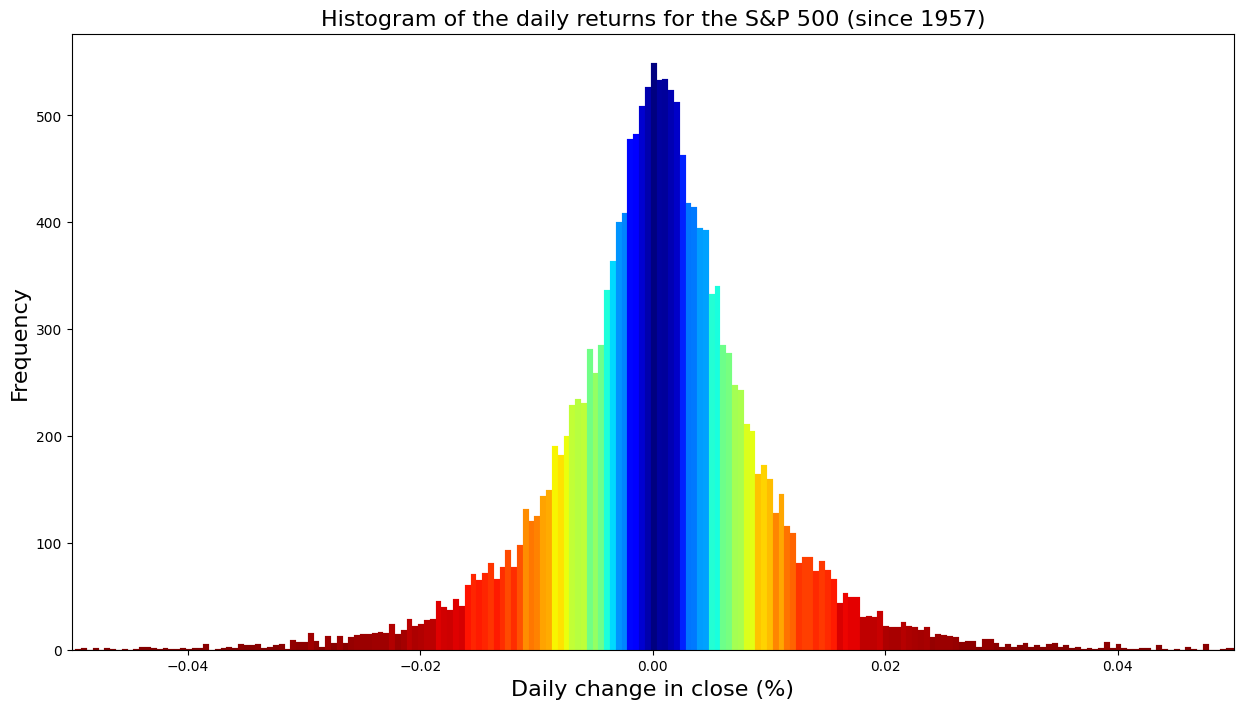

In [105]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df['pct_change'], binwidth=0.0005)
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet_r(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.title("Histogram of the daily returns for the S&P 500 (since 1957)", size=16)
plt.xlabel("Daily change in close (%)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xlim(-0.05, 0.05)

In [106]:
# define a Gaussian function
def Gaussian(x,mu,sigma,A):
    return A*np.exp(-0.5 * ((x-mu)/sigma)**2)
# define a Lorentzian function
def Cauchy(x, x0, gamma, A):
    return A * gamma**2/(gamma**2+( x - x0 )**2)

In [107]:
n_values = values.shape[0]
xmin = df['pct_change'].min()
xmax = df['pct_change'].max()
delta = xmax-xmin
x = np.arange(xmin, xmax, (delta/n_values))
y = values

In [108]:
# seed guess
initial_guess=(0, 0.005, 300)

In [109]:
# the Gaussian fit
G_parameters,G_covariance=curve_fit(Gaussian,x,y,initial_guess)
G_sigma=np.sqrt(np.diag(G_covariance))

In [110]:
# the Lorentzian fit
L_parameters,L_covariance=curve_fit(Cauchy,x,y,initial_guess)
L_sigma=np.sqrt(np.diag(L_covariance))

(-0.05, 0.05)

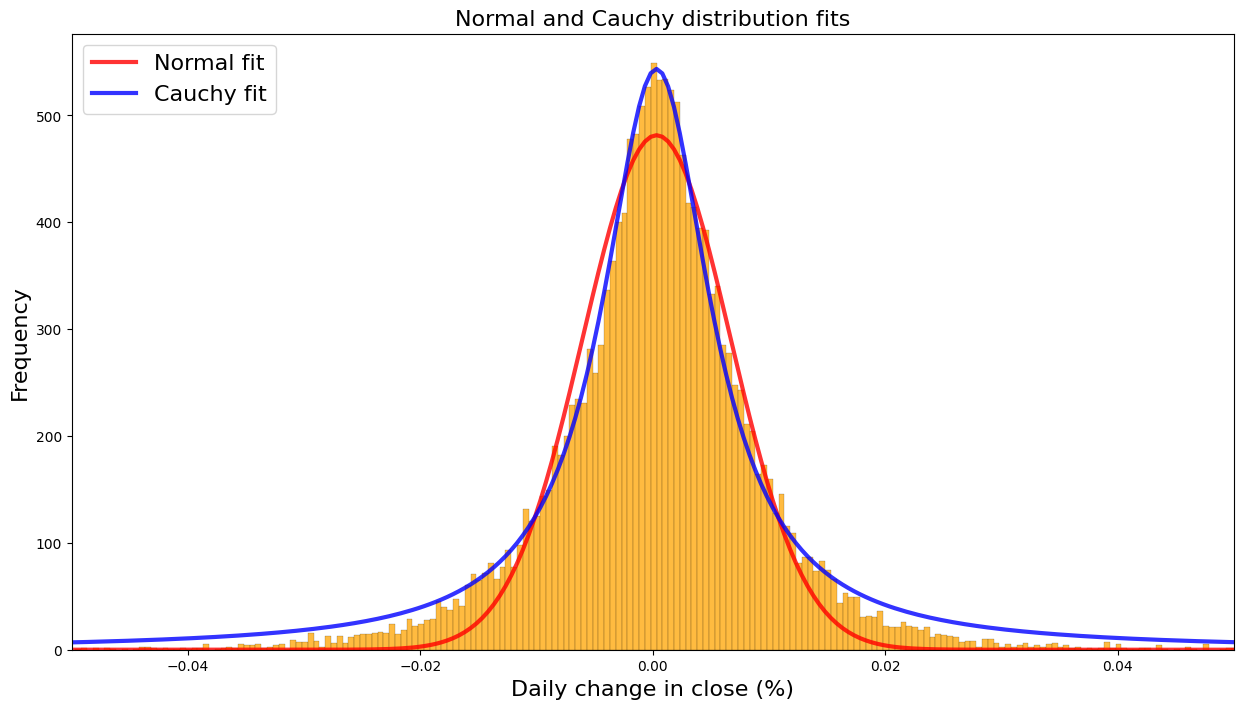

In [111]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df['pct_change'], binwidth=0.0005, color='orange')
ax = plt.plot(x,Gaussian(x,*G_parameters),  color='red', lw=3,label='Normal fit', alpha=0.8)
ax = plt.plot(x,Cauchy(x,*L_parameters),color='blue',lw=3,label='Cauchy fit', alpha=0.8)
plt.title("Normal and Cauchy distribution fits", size=16)
plt.legend(loc="upper left", fontsize=16)
plt.xlabel("Daily change in close (%)", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xlim(-0.05, 0.05)